# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [59]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lycksele
Processing Record 2 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 3 of Set 1 | as sulayyil
Processing Record 4 of Set 1 | hotan
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | tobi village
City not found. Skipping...
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | antalaha
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | varva
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | pithoro
Processing Record 15 of Set 1 | cobija
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | callao
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | puerto baqueri

In [60]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [61]:
#Checking the data types and fixing the date and time data.
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [63]:
city_data_df = city_data_df.astype({"Date": "datetime64[s]"})
city_data_df.dtypes

City                 object
Lat                 float64
Lng                 float64
Max Temp            float64
Humidity              int64
Cloudiness            int64
Wind Speed          float64
Country              object
Date          datetime64[s]
dtype: object

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lycksele,64.5954,18.6735,21.07,93,75,3.44,SE,2024-04-05 19:23:58
1,as sulayyil,20.4607,45.5779,77.25,40,76,8.79,SA,2024-04-05 19:23:58
2,hotan,37.0997,79.9269,55.99,22,53,3.29,CN,2024-04-05 19:23:58
3,punta arenas,-53.1500,-70.9167,59.02,58,75,33.38,CL,2024-04-05 19:21:22
4,grytviken,-54.2811,-36.5092,37.02,87,100,7.81,GS,2024-04-05 19:23:59


In [65]:
# Export the City_Data into a csv
city_data_df.to_csv("../resources/cities.csv", index_label="City_ID")

In [68]:
# Read saved data
city_data_df = pd.read_csv("../resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lycksele,64.5954,18.6735,21.07,93,75,3.44,SE,2024-04-05 19:23:58
1,as sulayyil,20.4607,45.5779,77.25,40,76,8.79,SA,2024-04-05 19:23:58
2,hotan,37.0997,79.9269,55.99,22,53,3.29,CN,2024-04-05 19:23:58
3,punta arenas,-53.1500,-70.9167,59.02,58,75,33.38,CL,2024-04-05 19:21:22
4,grytviken,-54.2811,-36.5092,37.02,87,100,7.81,GS,2024-04-05 19:23:59


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

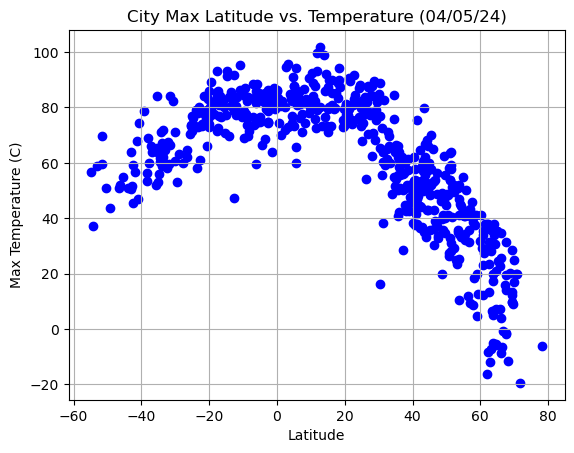

In [76]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df['Lat']
y_value = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_value, y_value, marker = 'o', color = 'b')
plt.title('City Max Latitude vs. Temperature (04/05/24)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

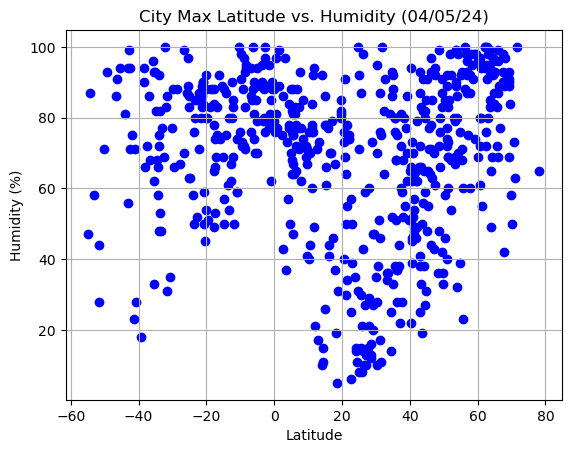

In [77]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df['Lat']
y_value = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_value, y_value, marker = 'o', color = 'b')
plt.title('City Max Latitude vs. Humidity (04/05/24)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

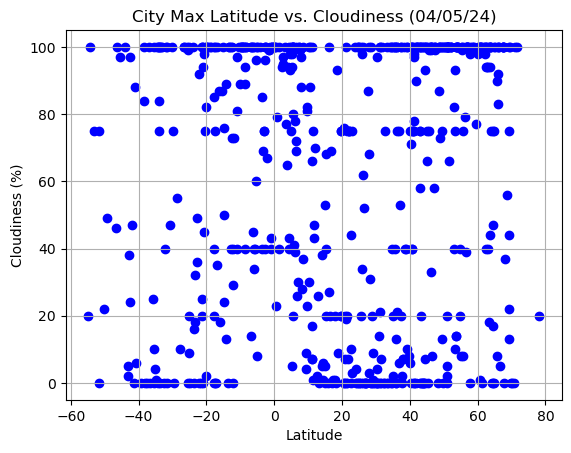

In [78]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df['Lat']
y_value = city_data_df['Cloudiness']
# Incorporate the other graph properties
plt.scatter(x_value, y_value, marker = 'o', color = 'b')
plt.title('City Max Latitude vs. Cloudiness (04/05/24)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

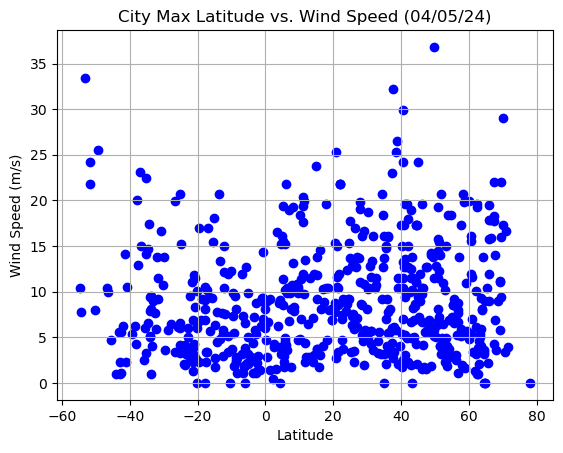

In [79]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df['Lat']
y_value = city_data_df['Wind Speed']
# Incorporate the other graph properties
plt.scatter(x_value, y_value, marker = 'o', color = 'b')
plt.title('City Max Latitude vs. Wind Speed (04/05/24)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lycksele,64.5954,18.6735,21.07,93,75,3.44,SE,2024-04-05 19:23:58
1,as sulayyil,20.4607,45.5779,77.25,40,76,8.79,SA,2024-04-05 19:23:58
2,hotan,37.0997,79.9269,55.99,22,53,3.29,CN,2024-04-05 19:23:58
6,longyearbyen,78.2186,15.6401,-5.96,65,20,0.00,SJ,2024-04-05 19:23:59
7,stanley,54.8680,-1.6985,54.99,76,20,18.41,GB,2024-04-05 19:23:59


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,punta arenas,-53.1500,-70.9167,59.02,58,75,33.38,CL,2024-04-05 19:21:22
4,grytviken,-54.2811,-36.5092,37.02,87,100,7.81,GS,2024-04-05 19:23:59
5,antalaha,-14.9003,50.2788,77.41,88,24,6.35,MG,2024-04-05 19:23:59
12,cobija,-11.0267,-68.7692,95.18,59,40,3.44,BO,2024-04-05 19:20:08
14,callao,-12.0667,-77.1500,77.29,69,0,14.97,PE,2024-04-05 19:19:57


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7627595589207833


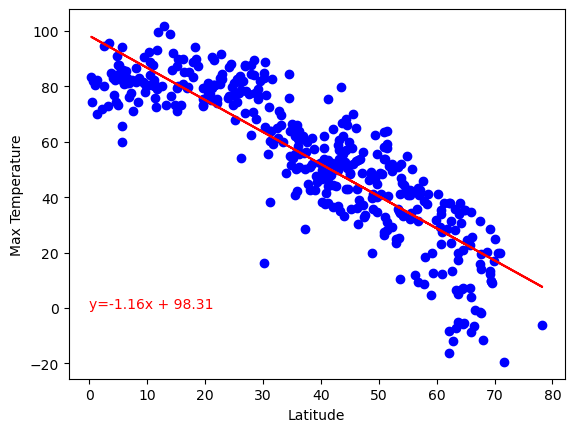

In [90]:
# Linear regression on Northern Hemisphere
x_value_north = northern_hemi_df['Lat']
y_value_north = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_north)
regress_value_north = x_value_north * slope + intercept
line_eq_north = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plotting
plt.scatter(x_value_north, y_value_north, marker='o', color = 'b')
plt.plot(x_value_north, regress_value_north, 'r')
plt.annotate(line_eq_north, (0,0), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.5062703444804538


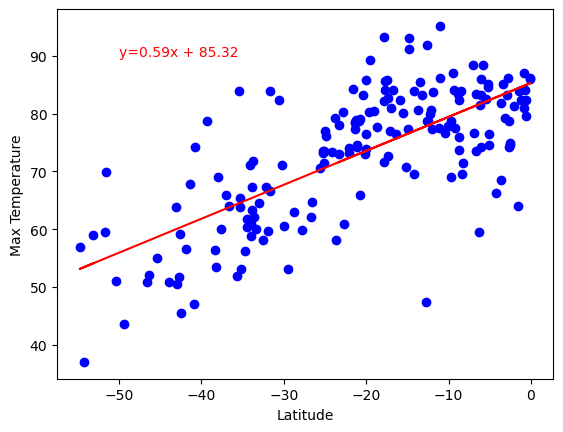

In [92]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
x_value_south = southern_hemi_df['Lat']
y_value_south = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_south)
regress_value_south = x_value_south * slope + intercept
line_eq_south = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plotting
plt.scatter(x_value_south, y_value_south, marker='o', color = 'b')
plt.plot(x_value_south, regress_value_south, 'r')
plt.annotate(line_eq_south, (-50,90), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** When we are talking about linear relationship, we can see two different relationships when looking at the Northern plot versus the Southern plot. While both of the plots depict temperature versus latitude, in the North, there is a strong r-value of 0.7627595589207833 and in the South there is a r-value of 0.5062703444804538, showing that the North has a stronger relationship as the r-value is closer to 1 than the r-value of the south. In the Southern Hemisphere we see that as latitude rises, the temperature tends to rise, showing a positive line. In the Northen Hemisphere, as latitude rises, temperature begins to fall, showing a negative relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07382818777211902


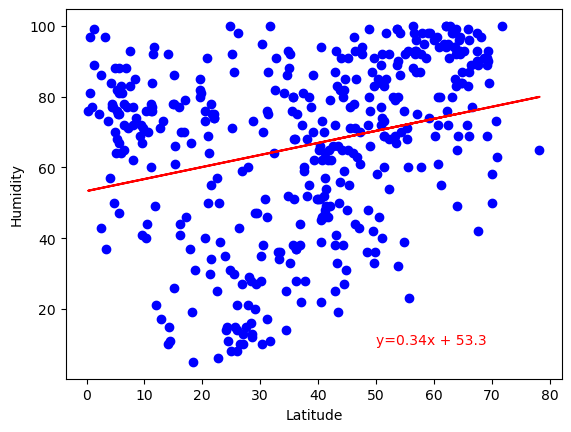

In [94]:
# Northern Hemisphere
x_value_north = northern_hemi_df['Lat']
y_value_north = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_north)
regress_value_north = x_value_north * slope + intercept
line_eq_north = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plotting
plt.scatter(x_value_north, y_value_north, marker='o', color = 'b')
plt.plot(x_value_north, regress_value_north, 'r')
plt.annotate(line_eq_north, (50,10), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.08215918566058744


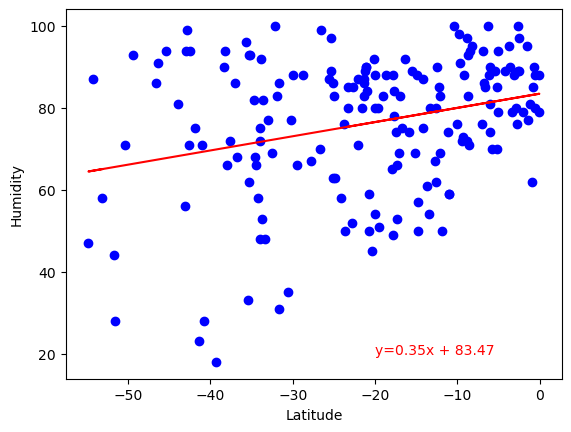

In [96]:
# Southern Hemisphere
x_value_south = southern_hemi_df['Lat']
y_value_south = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_south)
regress_value_south = x_value_south * slope + intercept
line_eq_south = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plotting
plt.scatter(x_value_south, y_value_south, marker='o', color = 'b')
plt.plot(x_value_south, regress_value_south, 'r')
plt.annotate(line_eq_south, (-20,20), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** When it comes to the linear relationship between latitude and humidity, both the Northern and Southern hemispheres have a weak relationship between the two, with the r-values of 0.07382818777211902 and 0.08215918566058744 respectively. From this, we can assume that latitude does not have a strong relationship with humidity in any hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.030875223600535566


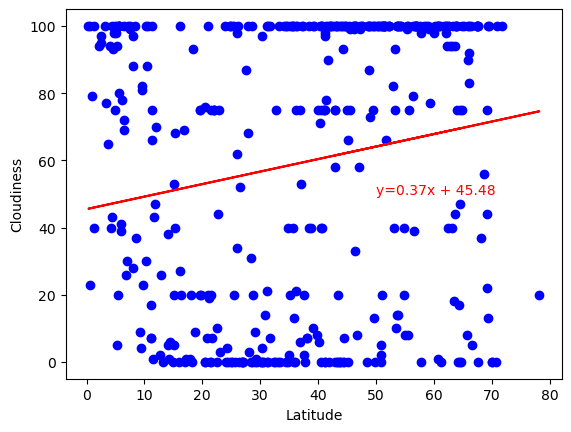

In [101]:
# Northern Hemisphere
x_value_north = northern_hemi_df['Lat']
y_value_north = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_north)
regress_value_north = x_value_north * slope + intercept
line_eq_north = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plotting
plt.scatter(x_value_north, y_value_north, marker='o', color = 'b')
plt.plot(x_value_north, regress_value_north, 'r')
plt.annotate(line_eq_north, (50,50), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.07632073416822344


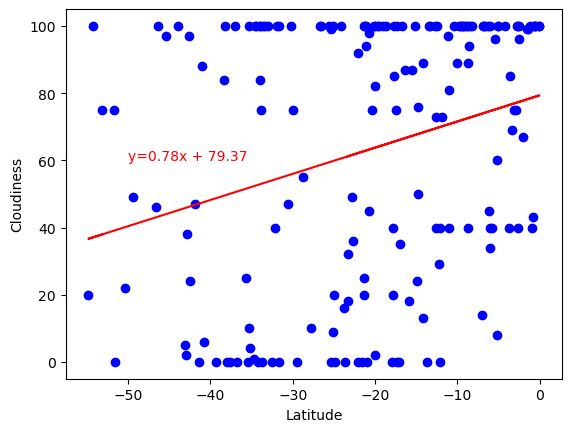

In [99]:
# Southern Hemisphere
x_value_south = southern_hemi_df['Lat']
y_value_south = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_south)
regress_value_south = x_value_south * slope + intercept
line_eq_south = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plotting
plt.scatter(x_value_south, y_value_south, marker='o', color = 'b')
plt.plot(x_value_south, regress_value_south, 'r')
plt.annotate(line_eq_south, (-50,60), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** When it comes to the linear relationship between latitude and cloudiness, there is no strong relation in either hemisphere. In both hemispheres, the r-value does not come close to even 0.5 (With the Northern hemisphere having a r-value of 0.03 and the Southen having a r-value of 0.08). We can assume from these charts that the linear relationship between latitude and cloudiness will be weak in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 1.3650045816069093e-05


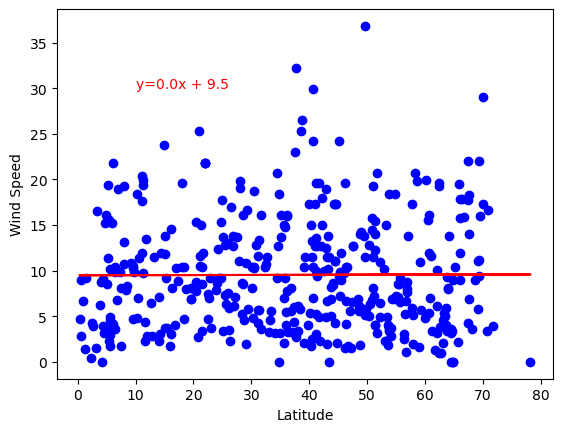

In [105]:
# Northern Hemisphere
x_value_north = northern_hemi_df['Lat']
y_value_north = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_north)
regress_value_north = x_value_north * slope + intercept
line_eq_north = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plotting
plt.scatter(x_value_north, y_value_north, marker='o', color = 'b')
plt.plot(x_value_north, regress_value_north, 'r')
plt.annotate(line_eq_north, (10,30), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.10344582709188249


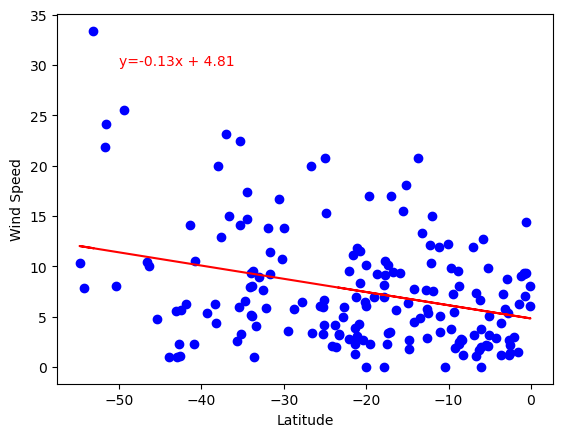

In [104]:
# Southern Hemisphere
x_value_south = southern_hemi_df['Lat']
y_value_south = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_south)
regress_value_south = x_value_south * slope + intercept
line_eq_south = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plotting
plt.scatter(x_value_south, y_value_south, marker='o', color = 'b')
plt.plot(x_value_south, regress_value_south, 'r')
plt.annotate(line_eq_south, (-50,30), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hempisphere, there is a stronger linear relationship with an r-value of 1.37. In the South there is a weaker linear relationship with an r-value of 0.1. This suggests a strong relationship between latitude and windspeed in the Northern Hemisphere. In contrast, we see a bit of a negative line in the Southern Hemisphere, suggesting a weak negative relationship between latitude and windspeed. 